# Exercises on least squares

In this exercise, we will implement the least squares method using the closed form formula we derived in the lecture. We will also use sklearn PolynomialFeatures to solve non linear problems with the least squares method and see how the computation time grows when the degree of the polynomial grows.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Creating the dataset

Let us start by creating a dataset representing a noisy cubic polynomial with equation $-0.2 x^3 + \mu$, where $\mu \sim \mathcal{N}(0, 4)$

In [3]:
np.random.seed(42)
X = (np.random.rand(100,1) - 0.5) * 10
y = -0.2 * X**3 + np.random.normal(loc=0, scale=2, size=[100,1])

Let's plot it

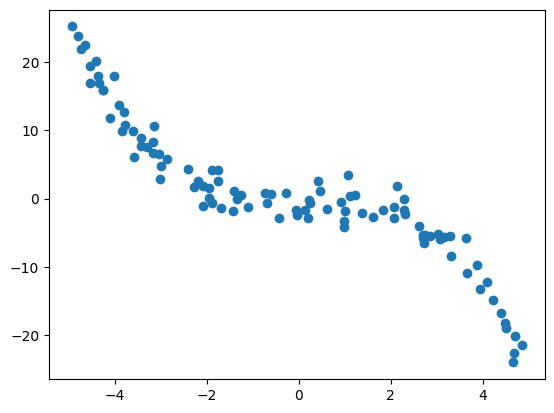

In [4]:
plt.scatter(X,y)
plt.show()

We need the data to be in homogeneous coordinates...

In [5]:
XX = np.concatenate([X, np.ones(shape=[len(X), 1])], axis=1)


# Define the least square "solver"

$w = (X^T X)^{-1} X^T y$

In [6]:
def least_squares(X,y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

Apply it to our data

In [7]:
ww = least_squares(XX, y)

In [8]:
ww

array([[-3.10224715],
       [ 0.06642012]])

It's time to plot results, use matplotlib to plot the data and the fitted curve.

**Hint**: use np.linspace to create a range of values for x and then plot the x,y pairs (where y is the predicted value).

In [9]:
xs = np.linspace(-5, 5)
ys = ww[0] * xs + ww[1]

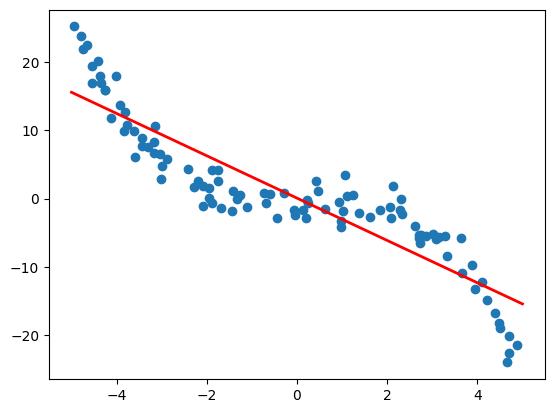

In [10]:
plt.scatter(X,y)
plt.plot(xs, ys, c='r', lw=2)
plt.show()

# Solving a non-linear problem using the "slow" kernel trick

Now solve the same problem, but using the PolynomialFeatures class to preprocess our data so that we can fit a degree 3 polynomial.

In [11]:
# instantiate in polyfeatures the class for doing the polynomial transformation
polyfeatures = PolynomialFeatures(degree=3, include_bias=True)

# transform the data and put the result into polyX
polyX = polyfeatures.fit_transform(X)

Now we can use our `least_squares` solver to find a solution in the transformed space...

In [12]:
polyww = least_squares(polyX, y)


Generate new data to plot the solution (again, using `linspace` to generate points in the interval $[-5,5]$).

In [13]:
xs = np.linspace(-5, 5, 100).reshape(-1,1)
polyxs = polyfeatures.transform(xs)
polyys = polyxs @ polyww


We can now plot the data and our solution

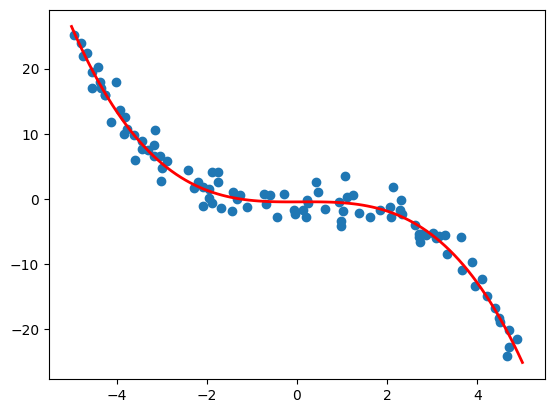

In [14]:
plt.scatter(X,y)
plt.plot(xs, polyys, c='r',lw=2)
plt.show()

# This kernel trick is slow!

What we just did is a poor version of the kernel trick. We are actually computing the mapping, which becomes very slow as the degree of the polynomial increases. Let's check how long it takes to compute the mapping for various degrees.

For this eperiment, we will use a dataset with 13 features and will grow the degree of the polynomial from 1 to 13.

In [15]:
X = np.random.rand(100, 13)

In [16]:
import time

results_degrees = []
results_time = []

for i in range(13):
    poly = PolynomialFeatures(degree=i+1)
    
    start = time.time()
    polyX = poly.fit_transform(X)
    end = time.time()

    results_degrees.append(i+1)
    results_time.append(end-start)

    print("{} \t Num features {:10d} Time {:2.4f}s".format(i+1, polyX.shape[1], end-start))


1 	 Num features         14 Time 0.0007s
2 	 Num features        105 Time 0.0011s
3 	 Num features        560 Time 0.0017s
4 	 Num features       2380 Time 0.0024s
5 	 Num features       8568 Time 0.0049s
6 	 Num features      27132 Time 0.0252s
7 	 Num features      77520 Time 0.0566s
8 	 Num features     203490 Time 0.0896s
9 	 Num features     497420 Time 0.2384s
10 	 Num features    1144066 Time 0.5033s
11 	 Num features    2496144 Time 1.0812s
12 	 Num features    5200300 Time 2.2307s
13 	 Num features   10400600 Time 8.7859s


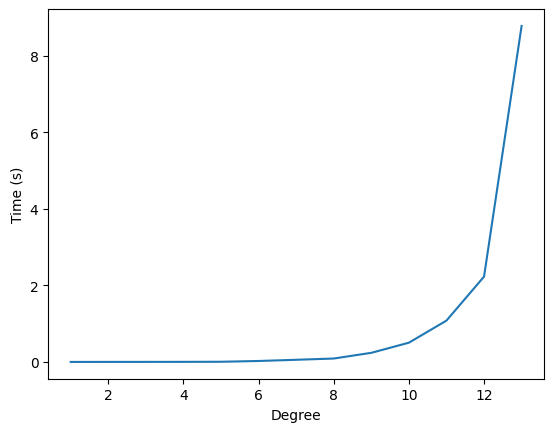

In [20]:
import matplotlib.pyplot as plt

plt.plot(results_degrees, results_time)
plt.xlabel("Degree")
plt.ylabel("Time (s)")
plt.show()